In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv('book.csv', encoding='latin1')
data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
null_counts = data.isnull().sum()
print(null_counts)

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64


In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
# Fill any missing values with an empty string
data['Book.Title'] = data['Book.Title'].fillna('')

In [6]:
# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Book.Title'])

In [7]:
# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [10]:
# Function to recommend books based on cosine similarity
def recommend_books(book_title, n=10):
    # Get the index of the book
    book_index = data[data['Book.Title'] == book_title].index[0]
    
    # Get similarity scores of the book with all other books
    similarity_scores = list(enumerate(cosine_sim_matrix[book_index]))
    
    # Sort books based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top n similar books (excluding the book itself)
    top_similar_books = similarity_scores[1:n+1]
    
    # Extract book indices
    similar_book_indices = [i[0] for i in top_similar_books]
    
    # Return recommended books
    return data.iloc[similar_book_indices]

In [11]:
# Example: Recommend books similar to 'Pride and Prejudice'
recommended_books = recommend_books('Pride and Prejudice')
print(recommended_books)

      User.ID                                         Book.Title  Book.Rating
7016     3757                                Pride and Prejudice            7
8670   161200                                Pride and Prejudice            6
3800     1211  Pride and Prejudice (Everyman Paperback Classics)           10
167    276875        Pride and Prejudice (Dover Thrift Editions)            8
8714   161222                                     Pride of Kings            9
7864     4017                                 The Pride of Lions           10
5280     2276                                       Calder Pride            9
8292     4339     Pride Of Lions (Harlequin Historical, No. 443)            7
2553      183  Love in Black and White: The Triumph of Love o...            9
3826     1219  OKLAHOMA PRIDE (Holts : An American Dynasty, V...            8


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

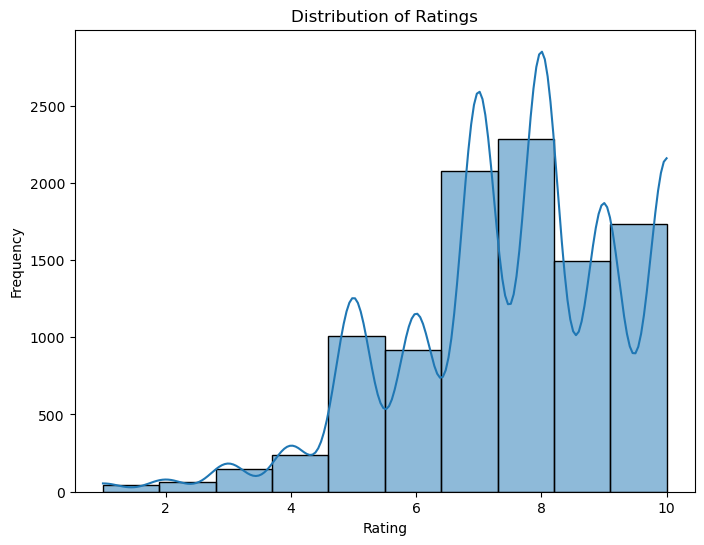

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Book.Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

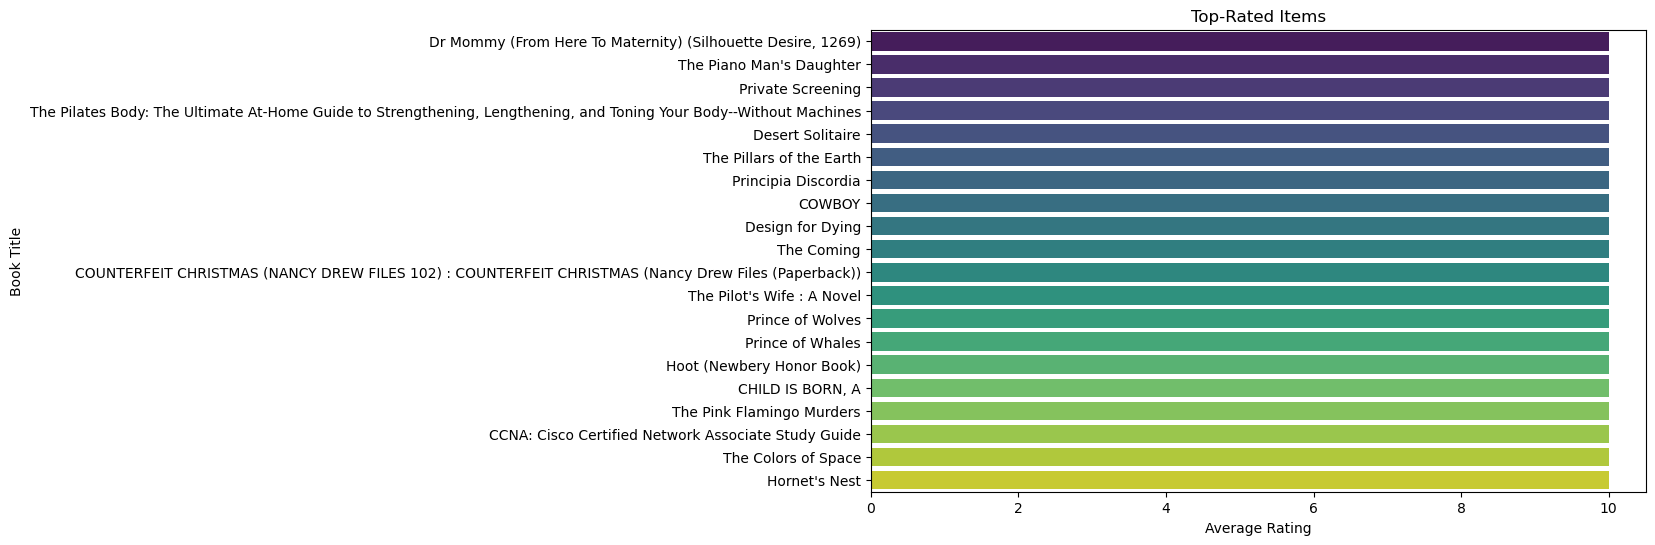

In [14]:
item_popularity = data.groupby('Book.Title')['Book.Rating'].mean().reset_index(name='average_rating')
top_rated_items = item_popularity.sort_values(by='average_rating', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='average_rating', y='Book.Title', data=top_rated_items, palette='viridis')
plt.title('Top-Rated Items')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()